In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams["lines.markersize"] = 2

## Simulating Data

In [3]:
class cone_cell:
    def __init__(self, lower_frequency, upper_frequency):
        self.lower_frequency = lower_frequency
        self.upper_frequency = upper_frequency

    def plot_range(self, axis):
        axis.plot()

In [4]:
def generate_cone_cell(mu, sigma):
    f1 = np.random.normal(mu, sigma)
    f2 = np.random.normal(mu, sigma)
    lower = min(f1, f2)
    upper = max(f1, f2)
    return cone_cell(lower_frequency=lower, upper_frequency=upper)

In [5]:
def generate_cone_cells(num, mu, sigma):
    cells = []
    for _ in range(num):
        cells.append(generate_cone_cell(mu, sigma))
    return cells

In [6]:
def generate_plotting_data(cells, min_freq, max_freq, delta_freq):
    num_freq = int((max_freq - min_freq) / delta_freq)
    freqs = np.ndarray(shape=num_freq)
    counts = np.ndarray(shape=num_freq)
    for i in range(num_freq):
        freq = min_freq + (i * delta_freq)
        count = 0
        freqs[i] = freq
        for cell in cells:
            if cell.lower_frequency <= freq and cell.upper_frequency >= freq:
                count += 1
        counts[i] = count
    return (freqs, counts)

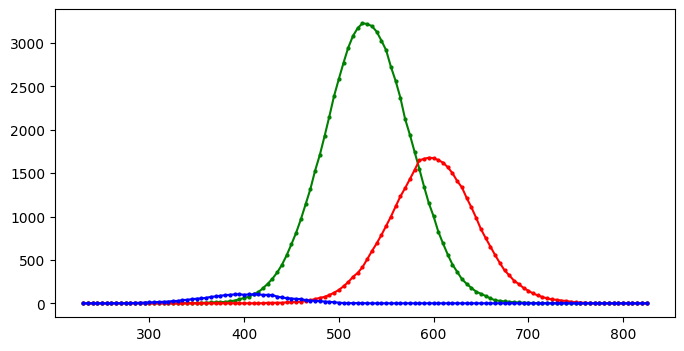

In [7]:
green_mu = 530
green_sigma = 50
percent_green = 0.65

red_mu = 600
red_sigma = 50
percent_red = 0.33

blue_mu = 400
blue_sigma = 50
percent_blue = 0.02

assert(percent_green + percent_red + percent_blue == 1)

## TWEAK THIS VALUE TO DETERMINE DIMENSIONALITY OF INITIAL DATA
total_num_cells = 10000

num_green = int(total_num_cells * percent_green)
num_red = int(total_num_cells * percent_red)
num_blue = int(total_num_cells * percent_blue)

green_cells = generate_cone_cells(num_green, green_mu, green_sigma)
red_cells = generate_cone_cells(num_red, red_mu, red_sigma)
blue_cells = generate_cone_cells(num_blue, blue_mu, blue_sigma)

all_cells = green_cells + red_cells + blue_cells

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
green_freqs, green_counts = generate_plotting_data(green_cells, 230, 830, 5)
ax.plot(green_freqs, green_counts, 'o-', color='green')

red_freqs, red_counts = generate_plotting_data(red_cells, 230, 830, 5)
ax.plot(red_freqs, red_counts, 'o-', color='red')

blue_freqs, blue_counts = generate_plotting_data(blue_cells, 230, 830, 5)
ax.plot(blue_freqs, blue_counts, 'o-', color='blue')

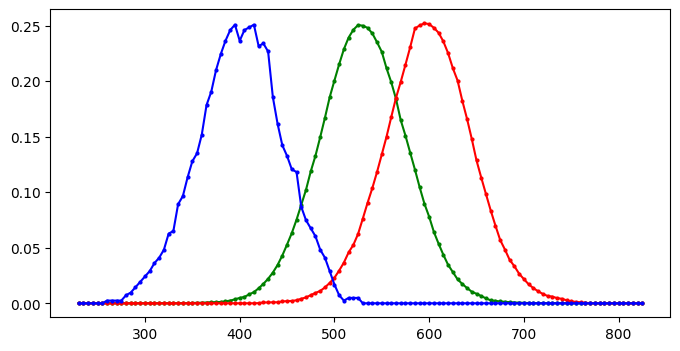

In [8]:
green_counts_normalized = green_counts / np.linalg.norm(green_counts)
red_counts_normalized = red_counts / np.linalg.norm(red_counts)
blue_counts_normalized = blue_counts / np.linalg.norm(blue_counts)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(green_freqs, green_counts_normalized, 'o-', color='green')
ax.plot(red_freqs, red_counts_normalized, 'o-', color='red')
ax.plot(blue_freqs, blue_counts_normalized, 'o-', color='blue')

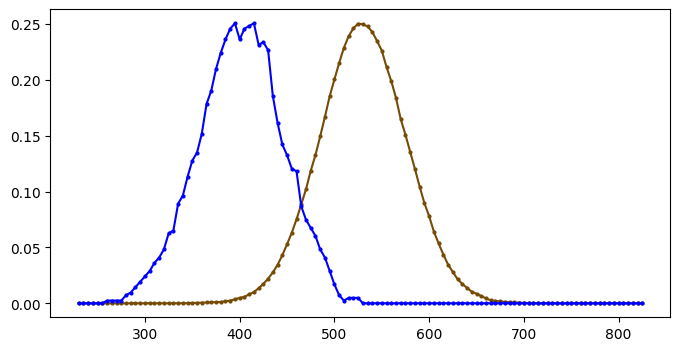

In [9]:
red_green_mu = (red_mu + green_mu) / 2
red_green_sigma = 50
num_red_green = num_red + num_green

red_green_cells = generate_cone_cells(num_red_green, red_green_mu, red_green_sigma)

red_green_freqs, red_green_counts = generate_plotting_data(red_green_cells, 230, 830, 5)
red_green_counts_normalized = red_green_counts / np.linalg.norm(red_green_counts)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(green_freqs, green_counts_normalized, 'o-', color='#764b05')
ax.plot(blue_freqs, blue_counts_normalized, 'o-', color='blue')

In [10]:
def get_cell_responses(cells, frequency):
    responses = np.zeros(shape=len(cells))
    i = 0
    for cell in cells:
        if cell.lower_frequency <= frequency and cell.upper_frequency >= frequency:
            responses[i] = 1
        else:
            responses[i] = 0
        i += 1
    return responses

In [11]:
def freq_to_color(freq):
    if freq < 450:
        return 'violet'
    elif freq < 495:
        return 'blue'
    elif freq < 570:
        return 'green'
    elif freq < 590:
        return 'yellow'
    elif freq < 620:
        return 'orange'
    else:
        return 'red'

In [12]:
def generate_data(num_data_points, cells, min_freq, max_freq):
    data = np.ndarray(shape=(num_data_points, len(cells)))
    freqs = np.random.uniform(low=min_freq, high=max_freq, size=num_data_points)
    classified_freqs = []
    i = 0
    for freq in freqs:
        data[i] = get_cell_responses(cells, freq)
        classified_freqs.append(freq_to_color(freq))
        i += 1
    return data, classified_freqs

In [13]:
num_data_points = 1000
min_freq = 380
max_freq = 750

print(len(all_cells))

data, freqs = generate_data(num_data_points=num_data_points, cells=all_cells, min_freq=min_freq, max_freq=max_freq)

10000


In [14]:
data

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [15]:
freqs

['green',
 'violet',
 'red',
 'red',
 'red',
 'blue',
 'green',
 'blue',
 'blue',
 'green',
 'red',
 'green',
 'green',
 'red',
 'red',
 'orange',
 'orange',
 'yellow',
 'orange',
 'blue',
 'orange',
 'red',
 'red',
 'red',
 'orange',
 'red',
 'yellow',
 'green',
 'red',
 'green',
 'violet',
 'red',
 'blue',
 'yellow',
 'red',
 'green',
 'green',
 'red',
 'green',
 'blue',
 'blue',
 'violet',
 'yellow',
 'violet',
 'green',
 'red',
 'green',
 'blue',
 'green',
 'green',
 'red',
 'red',
 'yellow',
 'blue',
 'violet',
 'red',
 'green',
 'violet',
 'red',
 'violet',
 'violet',
 'green',
 'blue',
 'orange',
 'red',
 'red',
 'orange',
 'green',
 'green',
 'violet',
 'blue',
 'blue',
 'red',
 'red',
 'green',
 'red',
 'blue',
 'violet',
 'red',
 'red',
 'yellow',
 'red',
 'violet',
 'blue',
 'blue',
 'green',
 'yellow',
 'red',
 'green',
 'red',
 'orange',
 'green',
 'red',
 'blue',
 'violet',
 'violet',
 'blue',
 'red',
 'red',
 'red',
 'violet',
 'green',
 'orange',
 'red',
 'yellow',
 'bl